In [1]:
import pandas as pd

bayes_df = pd.read_csv('bayes.csv')

In [2]:
bayes_df

,Unnamed: 0,RowNo,Application ID_x,Possession Work Type DS,BidKPI,Planned?,CalenderDate_x,Possession_Start_x,Possession_End_x,Corridor NM_x,...,CorridorLengthPossessed(km),MinutesPossessed,SystemLength_x,MinutesKmPossessed,start_time,end_time,difference_in_minutes/Downtime,Year,Month,status
0,0,1,ID1,Signals (generic),Inside 8 Weeks Out,Reactive,2021-04-05,2021-04-05 08:55:00,2021-04-09 16:31:00,CR1,...,3.880,905,33,3511.400,2021-04-05 08:55:00,2021-04-09 16:31:00,6216.0,2021,4,Unique
1,5,6,ID2,Signals (generic),Inside 10 Weeks Out,Reactive,2022-06-17,2022-06-09 21:15:00,2022-06-17 04:25:00,CR1,...,5.853,265,33,1551.045,2022-06-09 21:15:00,2022-06-17 04:25:00,10510.0,2022,6,Unique
2,6,7,ID3,Level Crossing,12 Weeks or More,Planned,2022-09-05,2022-09-05 19:30:00,2022-09-08 05:00:00,CR1,...,5.853,270,33,1580.310,2022-09-05 19:30:00,2022-09-08 05:00:00,3450.0,2022,9,Unique
3,8,9,ID4,Signals (generic),Inside 12 Weeks Out,Reactive,2022-07-14,2022-07-14 10:04:00,2022-07-19 16:00:00,CR1,...,5.853,836,33,4893.108,2022-07-14 10:04:00,2022-07-19 16:00:00,7556.0,2022,7,Unique
4,9,10,ID5,Signals (generic),Inside 8 Weeks Out,Reactive,2022-07-27,2022-07-27 09:52:00,2022-07-29 14:12:00,CR1,...,5.853,848,33,4963.344,2022-07-27 09:52:00,2022-07-29 14:12:00,3140.0,2022,7,Unique
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,4972,4973,ID1845,Re-Surfacing,12 Weeks or More,Planned,2022-04-16,2022-04-15 06:13:00,2022-04-16 00:00:00,CR46,...,50.000,0,1000,0.000,2022-04-15 06:13:00,2022-04-16 00:00:00,1067.0,2022,4,Unique
1955,4974,4975,ID1846,General Track Maintenance,Inside 8 Weeks Out,Reactive,2021-09-18,2021-09-18 10:16:00,2021-09-22 16:00:00,CR49,...,62.870,824,1000,51804.880,2021-09-18 10:16:00,2021-09-22 16:00:00,6104.0,2021,9,Unique
1956,4976,4977,ID1847,General Track Maintenance,Inside 8 Weeks Out,Reactive,2021-09-24,2021-09-23 07:05:00,2021-09-24 16:16:00,CR49,...,62.870,976,1000,61361.120,2021-09-23 07:05:00,2021-09-24 16:16:00,1991.0,2021,9,Unique
1957,4981,4982,ID1848,Re-Railing,12 Weeks or More,Planned,2022-04-07,2022-04-07 15:50:00,2022-04-14 11:37:00,CR49,...,65.670,490,1000,32178.300,2022-04-07 15:50:00,2022-04-14 11:37:00,9827.0,2022,4,Unique


In [3]:
!pip install pgmpy
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.estimators import MaximumLikelihoodEstimator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 kB 740.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 180.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 264.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 161.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 259.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 141.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully uninstalled protobuf-4.25.3
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.62.2
    Uninstalling grpcio-1.62.2:
      Successfully uninstalled grpcio-1.62.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

In [4]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.estimators import MaximumLikelihoodEstimator
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load your data from the CSV file
bayes_df = pd.read_csv('bayes.csv')

# Selecting relevant columns (adjust as per your CSV file)
relevant_columns = ['Planned?', 'MinutesPossessed', 'CorridorLengthPossessed(km)', 'difference_in_minutes/Downtime']

# Creating the cleaned DataFrame
bayes_df_relevant = bayes_df[relevant_columns]

# Filter rows with meaningful values (greater than zero) and drop any remaining NaNs
bayes_df_relevant = bayes_df_relevant[(bayes_df_relevant['MinutesPossessed'] > 0) &
                                      (bayes_df_relevant['CorridorLengthPossessed(km)'] > 0) &
                                      (bayes_df_relevant['difference_in_minutes/Downtime'] > 0)]

# Log transformation for downtime to reduce skewness
bayes_df_relevant['LogDowntime'] = np.log1p(bayes_df_relevant['difference_in_minutes/Downtime'])

# Dropping any rows with missing values after transformations
bayes_df_relevant = bayes_df_relevant.dropna()

# Perform HillClimbSearch to find the best structure for Bayesian Network
hc = HillClimbSearch(bayes_df_relevant)
best_model = hc.estimate(scoring_method=BicScore(bayes_df_relevant))

# Create the Bayesian Network model
model = BayesianNetwork(best_model.edges())

# Fit the model to the data using MaximumLikelihoodEstimator
model.fit(bayes_df_relevant, estimator=MaximumLikelihoodEstimator)

# Displaying the structure of the Bayesian Network
print("Bayesian Network structure:")
print(best_model.edges())

# Check if 'Planned?' affects 'LogDowntime'
if ('Planned?', 'LogDowntime') in best_model.edges():
    print("'Planned?' has a direct effect on downtime.")
else:
    print("'Planned?' does not have a direct effect on downtime.")



INFO:matplotlib.font_manager:generated new fontManager


  0%|          | 0/1000000 [00:00<?, ?it/s]

Bayesian Network structure:
[]
'Planned?' does not have a direct effect on downtime.


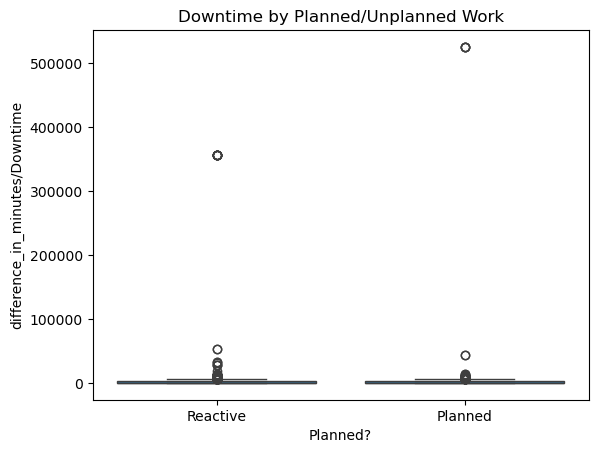

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the relationship between 'Planned?' and downtime
sns.boxplot(x='Planned?', y='difference_in_minutes/Downtime', data=bayes_df_relevant)
plt.title("Downtime by Planned/Unplanned Work")
plt.show()

In [6]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.estimators import MaximumLikelihoodEstimator
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load your data from the CSV file
bayes_df = pd.read_csv('bayes.csv')

# Selecting relevant columns including 'Planned?' and 'MinutesKmPossessed'
relevant_columns = ['Planned?', 'MinutesKmPossessed', 'MinutesPossessed', 'CorridorLengthPossessed(km)', 'difference_in_minutes/Downtime']

# Creating the cleaned DataFrame
bayes_df_relevant = bayes_df[relevant_columns]

# Filter rows with meaningful values (greater than zero) and drop any remaining NaNs
bayes_df_relevant = bayes_df_relevant[(bayes_df_relevant['MinutesPossessed'] > 0) &
                                      (bayes_df_relevant['CorridorLengthPossessed(km)'] > 0) &
                                      (bayes_df_relevant['MinutesKmPossessed'] > 0)]

# Log transformation for downtime to reduce skewness (optional, if needed)
bayes_df_relevant['LogDowntime'] = np.log1p(bayes_df_relevant['difference_in_minutes/Downtime'])

# Dropping any rows with missing values after transformations
bayes_df_relevant = bayes_df_relevant.dropna()

# Perform HillClimbSearch to find the best structure for Bayesian Network
hc = HillClimbSearch(bayes_df_relevant)
best_model = hc.estimate(scoring_method=BicScore(bayes_df_relevant))

# Create the Bayesian Network model
model = BayesianNetwork(best_model.edges())

# Fit the model to the data using MaximumLikelihoodEstimator
model.fit(bayes_df_relevant, estimator=MaximumLikelihoodEstimator)

# Displaying the structure of the Bayesian Network
print("Bayesian Network structure:")
print(best_model.edges())

# Check if 'Planned?' affects 'MinutesKmPossessed'
if ('Planned?', 'MinutesKmPossessed') in best_model.edges():
    print("'Planned?' has a direct effect on MinutesKmPossessed.")
else:
    print("'Planned?' does not have a direct effect on MinutesKmPossessed.")

# # Convert Bayesian network to NetworkX graph and draw
# G = nx.DiGraph(best_model.edges())
# plt.figure(figsize=(10, 7))  # Set figure size for better visualization
# nx.draw(G, with_labels=True, node_size=3000, font_size=10, node_color='lightblue', font_weight='bold')
# plt.show()


  0%|          | 0/1000000 [00:00<?, ?it/s]

Bayesian Network structure:
[]
'Planned?' does not have a direct effect on MinutesKmPossessed.


  0%|          | 0/1000000 [00:00<?, ?it/s]

Bayesian Network structure:
[('Planned?', 'Possession Work Type DS')]
The following factors have a direct effect on downtime: []


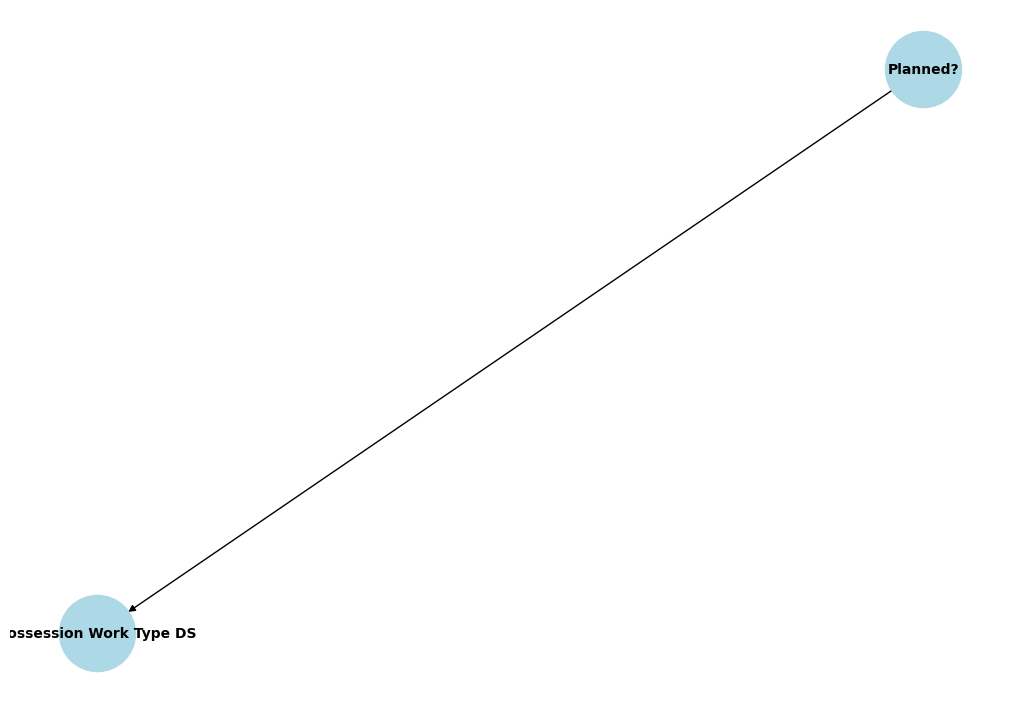

In [7]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.estimators import MaximumLikelihoodEstimator
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load your data from the CSV file
bayes_df = pd.read_csv('bayes.csv')

# Selecting relevant columns that may affect downtime
relevant_columns = ['Possession Work Type DS', 'Planned?', 'MinutesPossessed', 
                    'CorridorLengthPossessed(km)', 'MinutesKmPossessed', 'difference_in_minutes/Downtime']

# Creating the cleaned DataFrame
bayes_df_relevant = bayes_df[relevant_columns]

# Filter rows with meaningful values (greater than zero) and drop any remaining NaNs
bayes_df_relevant = bayes_df_relevant[(bayes_df_relevant['MinutesPossessed'] > 0) &
                                      (bayes_df_relevant['CorridorLengthPossessed(km)'] > 0) &
                                      (bayes_df_relevant['MinutesKmPossessed'] > 0) &
                                      (bayes_df_relevant['difference_in_minutes/Downtime'] > 0)]

# Log transformation for downtime to reduce skewness
bayes_df_relevant['LogDowntime'] = np.log1p(bayes_df_relevant['difference_in_minutes/Downtime'])

# Dropping any rows with missing values after transformations
bayes_df_relevant = bayes_df_relevant.dropna()

# Perform HillClimbSearch to find the best structure for Bayesian Network
hc = HillClimbSearch(bayes_df_relevant)
best_model = hc.estimate(scoring_method=BicScore(bayes_df_relevant))

# Create the Bayesian Network model
model = BayesianNetwork(best_model.edges())

# Fit the model to the data using MaximumLikelihoodEstimator
model.fit(bayes_df_relevant, estimator=MaximumLikelihoodEstimator)

# Displaying the structure of the Bayesian Network
print("Bayesian Network structure:")
print(best_model.edges())

# Check which factors directly affect 'LogDowntime'
affecting_downtime = [edge[0] for edge in best_model.edges() if edge[1] == 'LogDowntime']
print(f"The following factors have a direct effect on downtime: {affecting_downtime}")

# Convert Bayesian network to NetworkX graph and draw
G = nx.DiGraph(best_model.edges())
plt.figure(figsize=(10, 7))  # Set figure size for better visualization
nx.draw(G, with_labels=True, node_size=3000, font_size=10, node_color='lightblue', font_weight='bold')
plt.show()


Possession Work Type DS
Any form of Undercutting, except BCM                                              1852.500000
Ballast Cleaning / Undercutter Machine Major Projects                              429.781250
Bridge Construction                                                               6753.333333
Bridge Mtce                                                                       2415.032710
Burning or control of fire hazards                                              350484.500000
Contractor                                                                        4833.151515
Culvert Renewal                                                                   1045.625000
Diamond Replacement                                                                658.000000
Drain Renewal                                                                     7646.166667
Drop off Rail                                                                        0.000000
Earthworks                          

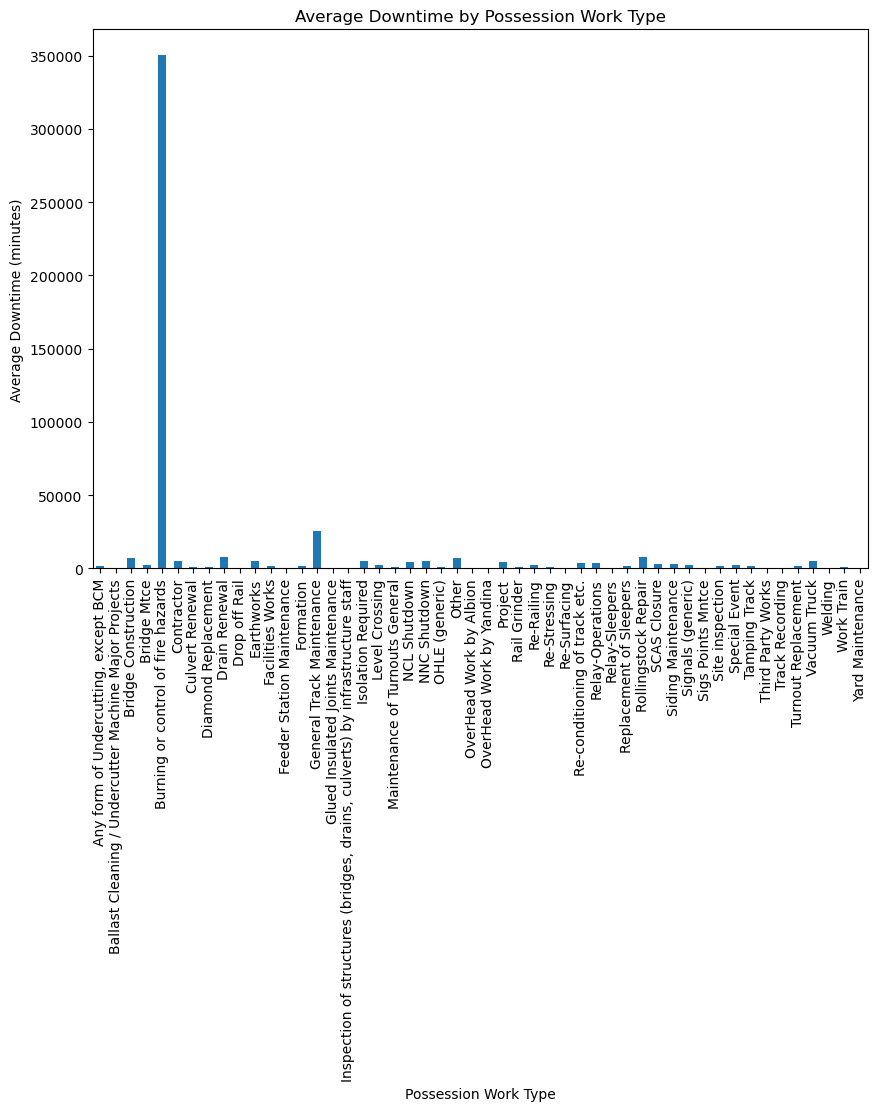

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
bayes_df = pd.read_csv('bayes.csv')

# Group the data by 'Possession Work Type' and calculate mean downtime
possession_downtime = bayes_df.groupby('Possession Work Type DS')['difference_in_minutes/Downtime'].mean()

# Display the mean downtime for each possession type
print(possession_downtime)

# Plot the results for better visualization
possession_downtime.plot(kind='bar', figsize=(10, 7))
plt.title('Average Downtime by Possession Work Type')
plt.xlabel('Possession Work Type')
plt.ylabel('Average Downtime (minutes)')
plt.xticks(rotation=90)
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
bayes_df = pd.read_csv('bayes.csv')

filtered_df = bayes_df['Possession Work Type DS'].unique()

# Display the mean downtime for each possession type
print(filtered_df)


['Signals (generic)' 'Level Crossing' 'Bridge Mtce'
 'General Track Maintenance' 'Sigs Points Mntce' 'Drain Renewal'
 'Re-conditioning of track etc.' 'Earthworks' 'Welding'
 'Replacement of Sleepers' 'Re-Stressing' 'OverHead Work by Albion'
 'Contractor' 'Culvert Renewal' 'Any form of Undercutting, except BCM'
 'Re-Railing' 'Other' 'Bridge Construction' 'SCAS Closure'
 'OHLE (generic)' 'OverHead Work by Yandina' 'Feeder Station Maintenance'
 'Work Train' 'Project' 'Relay-Sleepers' 'Special Event'
 'Glued Insulated Joints Maintenance'
 'Ballast Cleaning / Undercutter Machine Major Projects'
 'Isolation Required'
 'Inspection of structures (bridges, drains, culverts) by infrastructure staff'
 'Siding Maintenance' 'Turnout Replacement' 'Site inspection'
 'Rail Grinder' 'Re-Surfacing' 'Facilities Works' 'NNC Shutdown'
 'Vacuum Truck' 'Yard Maintenance' 'Maintenance of Turnouts General'
 'Burning or control of fire hazards' 'Track Recording'
 'Rollingstock Repair' 'Third Party Works' 'Tampi

In [10]:
# Filter out the outlier
filtered_df = bayes_df[bayes_df['Possession Work Type DS'] != 'Burning or control of fire hazards']

# Apply the groupby operation on the filtered DataFrame
possession_downtime1 = filtered_df.groupby('Possession Work Type DS')['difference_in_minutes/Downtime'].mean()

# Display the result
print(possession_downtime1)


Possession Work Type DS
Any form of Undercutting, except BCM                                             1852.500000
Ballast Cleaning / Undercutter Machine Major Projects                             429.781250
Bridge Construction                                                              6753.333333
Bridge Mtce                                                                      2415.032710
Contractor                                                                       4833.151515
Culvert Renewal                                                                  1045.625000
Diamond Replacement                                                               658.000000
Drain Renewal                                                                    7646.166667
Drop off Rail                                                                       0.000000
Earthworks                                                                       4947.947368
Facilities Works                              

NameError: name 'six' is not defined

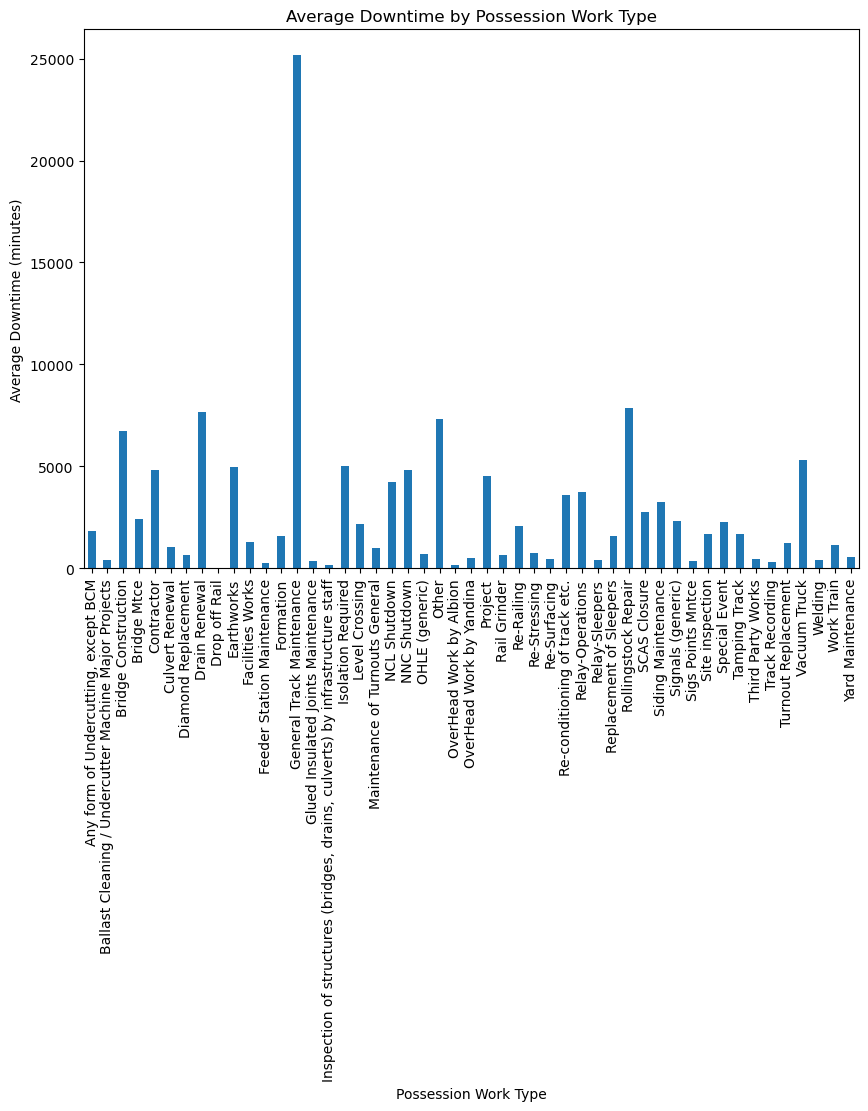

In [11]:
possession_downtime1.plot(kind='bar', figsize=(10, 7))
plt.title('Average Downtime by Possession Work Type')
plt.xlabel('Possession Work Type')
plt.ylabel('Average Downtime (minutes)')
plt.xticks(rotation=90)
plt.savefig('downtime_possessiontype',bbox_inches=six)
plt.show()


# bayes infernce 

In [12]:
!pip install pgmpy
import pandas as pd
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator



bayes_df=pd.read_csv('bayes.csv')
bayes_df = bayes_df.rename(columns={'difference_in_minutes/Downtime': 'Downtime'})


In [13]:

bayes_df = bayes_df.rename(columns={'difference_in_minutes/Downtime': 'Downtime'})
bayes_df

,Unnamed: 0,RowNo,Application ID_x,Possession Work Type DS,BidKPI,Planned?,CalenderDate_x,Possession_Start_x,Possession_End_x,Corridor NM_x,...,CorridorLengthPossessed(km),MinutesPossessed,SystemLength_x,MinutesKmPossessed,start_time,end_time,Downtime,Year,Month,status
0,0,1,ID1,Signals (generic),Inside 8 Weeks Out,Reactive,2021-04-05,2021-04-05 08:55:00,2021-04-09 16:31:00,CR1,...,3.880,905,33,3511.400,2021-04-05 08:55:00,2021-04-09 16:31:00,6216.0,2021,4,Unique
1,5,6,ID2,Signals (generic),Inside 10 Weeks Out,Reactive,2022-06-17,2022-06-09 21:15:00,2022-06-17 04:25:00,CR1,...,5.853,265,33,1551.045,2022-06-09 21:15:00,2022-06-17 04:25:00,10510.0,2022,6,Unique
2,6,7,ID3,Level Crossing,12 Weeks or More,Planned,2022-09-05,2022-09-05 19:30:00,2022-09-08 05:00:00,CR1,...,5.853,270,33,1580.310,2022-09-05 19:30:00,2022-09-08 05:00:00,3450.0,2022,9,Unique
3,8,9,ID4,Signals (generic),Inside 12 Weeks Out,Reactive,2022-07-14,2022-07-14 10:04:00,2022-07-19 16:00:00,CR1,...,5.853,836,33,4893.108,2022-07-14 10:04:00,2022-07-19 16:00:00,7556.0,2022,7,Unique
4,9,10,ID5,Signals (generic),Inside 8 Weeks Out,Reactive,2022-07-27,2022-07-27 09:52:00,2022-07-29 14:12:00,CR1,...,5.853,848,33,4963.344,2022-07-27 09:52:00,2022-07-29 14:12:00,3140.0,2022,7,Unique
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,4972,4973,ID1845,Re-Surfacing,12 Weeks or More,Planned,2022-04-16,2022-04-15 06:13:00,2022-04-16 00:00:00,CR46,...,50.000,0,1000,0.000,2022-04-15 06:13:00,2022-04-16 00:00:00,1067.0,2022,4,Unique
1955,4974,4975,ID1846,General Track Maintenance,Inside 8 Weeks Out,Reactive,2021-09-18,2021-09-18 10:16:00,2021-09-22 16:00:00,CR49,...,62.870,824,1000,51804.880,2021-09-18 10:16:00,2021-09-22 16:00:00,6104.0,2021,9,Unique
1956,4976,4977,ID1847,General Track Maintenance,Inside 8 Weeks Out,Reactive,2021-09-24,2021-09-23 07:05:00,2021-09-24 16:16:00,CR49,...,62.870,976,1000,61361.120,2021-09-23 07:05:00,2021-09-24 16:16:00,1991.0,2021,9,Unique
1957,4981,4982,ID1848,Re-Railing,12 Weeks or More,Planned,2022-04-07,2022-04-07 15:50:00,2022-04-14 11:37:00,CR49,...,65.670,490,1000,32178.300,2022-04-07 15:50:00,2022-04-14 11:37:00,9827.0,2022,4,Unique


In [14]:
bins = [0, 3000, 6000, bayes_df['Downtime'].max()]
labels = ['Low', 'Medium', 'High']
bayes_df['Downtime_Category'] = pd.cut(bayes_df['Downtime'], bins=bins, labels=labels)


In [15]:
bayes_df

,Unnamed: 0,RowNo,Application ID_x,Possession Work Type DS,BidKPI,Planned?,CalenderDate_x,Possession_Start_x,Possession_End_x,Corridor NM_x,...,MinutesPossessed,SystemLength_x,MinutesKmPossessed,start_time,end_time,Downtime,Year,Month,status,Downtime_Category
0,0,1,ID1,Signals (generic),Inside 8 Weeks Out,Reactive,2021-04-05,2021-04-05 08:55:00,2021-04-09 16:31:00,CR1,...,905,33,3511.400,2021-04-05 08:55:00,2021-04-09 16:31:00,6216.0,2021,4,Unique,High
1,5,6,ID2,Signals (generic),Inside 10 Weeks Out,Reactive,2022-06-17,2022-06-09 21:15:00,2022-06-17 04:25:00,CR1,...,265,33,1551.045,2022-06-09 21:15:00,2022-06-17 04:25:00,10510.0,2022,6,Unique,High
2,6,7,ID3,Level Crossing,12 Weeks or More,Planned,2022-09-05,2022-09-05 19:30:00,2022-09-08 05:00:00,CR1,...,270,33,1580.310,2022-09-05 19:30:00,2022-09-08 05:00:00,3450.0,2022,9,Unique,Medium
3,8,9,ID4,Signals (generic),Inside 12 Weeks Out,Reactive,2022-07-14,2022-07-14 10:04:00,2022-07-19 16:00:00,CR1,...,836,33,4893.108,2022-07-14 10:04:00,2022-07-19 16:00:00,7556.0,2022,7,Unique,High
4,9,10,ID5,Signals (generic),Inside 8 Weeks Out,Reactive,2022-07-27,2022-07-27 09:52:00,2022-07-29 14:12:00,CR1,...,848,33,4963.344,2022-07-27 09:52:00,2022-07-29 14:12:00,3140.0,2022,7,Unique,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,4972,4973,ID1845,Re-Surfacing,12 Weeks or More,Planned,2022-04-16,2022-04-15 06:13:00,2022-04-16 00:00:00,CR46,...,0,1000,0.000,2022-04-15 06:13:00,2022-04-16 00:00:00,1067.0,2022,4,Unique,Low
1955,4974,4975,ID1846,General Track Maintenance,Inside 8 Weeks Out,Reactive,2021-09-18,2021-09-18 10:16:00,2021-09-22 16:00:00,CR49,...,824,1000,51804.880,2021-09-18 10:16:00,2021-09-22 16:00:00,6104.0,2021,9,Unique,High
1956,4976,4977,ID1847,General Track Maintenance,Inside 8 Weeks Out,Reactive,2021-09-24,2021-09-23 07:05:00,2021-09-24 16:16:00,CR49,...,976,1000,61361.120,2021-09-23 07:05:00,2021-09-24 16:16:00,1991.0,2021,9,Unique,Low
1957,4981,4982,ID1848,Re-Railing,12 Weeks or More,Planned,2022-04-07,2022-04-07 15:50:00,2022-04-14 11:37:00,CR49,...,490,1000,32178.300,2022-04-07 15:50:00,2022-04-14 11:37:00,9827.0,2022,4,Unique,High


In [16]:
filter_df= bayes_df['Possession Work Type DS'].unique()
print(filter_df)
print(len(filter_df))

['Signals (generic)' 'Level Crossing' 'Bridge Mtce'
 'General Track Maintenance' 'Sigs Points Mntce' 'Drain Renewal'
 'Re-conditioning of track etc.' 'Earthworks' 'Welding'
 'Replacement of Sleepers' 'Re-Stressing' 'OverHead Work by Albion'
 'Contractor' 'Culvert Renewal' 'Any form of Undercutting, except BCM'
 'Re-Railing' 'Other' 'Bridge Construction' 'SCAS Closure'
 'OHLE (generic)' 'OverHead Work by Yandina' 'Feeder Station Maintenance'
 'Work Train' 'Project' 'Relay-Sleepers' 'Special Event'
 'Glued Insulated Joints Maintenance'
 'Ballast Cleaning / Undercutter Machine Major Projects'
 'Isolation Required'
 'Inspection of structures (bridges, drains, culverts) by infrastructure staff'
 'Siding Maintenance' 'Turnout Replacement' 'Site inspection'
 'Rail Grinder' 'Re-Surfacing' 'Facilities Works' 'NNC Shutdown'
 'Vacuum Truck' 'Yard Maintenance' 'Maintenance of Turnouts General'
 'Burning or control of fire hazards' 'Track Recording'
 'Rollingstock Repair' 'Third Party Works' 'Tampi

In [17]:
activity_category_map = {
    # Maintenance Practices
    'General Track Maintenance': 'Maintenance Practices',
    'Signals (generic)': 'Maintenance Practices',
    'Level Crossing': 'Maintenance Practices',
    'Sigs Points Mntce': 'Maintenance Practices',
    'Bridge Mtce (Bridge Maintenance)': 'Maintenance Practices',
    'Earthworks': 'Maintenance Practices',
    'Welding': 'Maintenance Practices',
    'Replacement of Sleepers': 'Maintenance Practices',
    'Re-Stressing': 'Maintenance Practices',
    'OverHead Work by Albion': 'Maintenance Practices',
    'OverHead Work by Yandina': 'Maintenance Practices',
    'Drain Renewal': 'Maintenance Practices',
    'Re-conditioning of track etc.': 'Maintenance Practices',
    'Re-Railing': 'Maintenance Practices',
    'Culvert Renewal': 'Maintenance Practices',
    'Feeder Station Maintenance': 'Maintenance Practices',
    'OHLE (generic)': 'Maintenance Practices',
    'Turnout Replacement': 'Maintenance Practices',
    'Inspection of structures (bridges, drains, culverts)': 'Maintenance Practices',
    'Siding Maintenance': 'Maintenance Practices',
    'Yard Maintenance': 'Maintenance Practices',
    'Maintenance of Turnouts General': 'Maintenance Practices',
    'Glued Insulated Joints Maintenance': 'Maintenance Practices',
    'Rollingstock Repair': 'Maintenance Practices',
    'Vacuum Truck': 'Maintenance Practices',
    'Bridge Construction': 'Maintenance Practices',
    'Burning or control of fire hazards': 'Maintenance Practices',
    'Tamping Track': 'Maintenance Practices',
    'Track Recording': 'Maintenance Practices',
    'Diamond Replacement': 'Maintenance Practices',
    'Re-Surfacing': 'Maintenance Practices',
    'Any form of Undercutting, except BCM': 'Maintenance Practices',
    'Bridge Mtce': 'Maintenance Practices',
    'Other': 'Maintenance Practices',
    'Rail Grinder': 'Maintenance Practices',
    'Track Recording':' Maintenance Practices',
    'OverHead Work by Albion': 'Maintenance Practices',
    'OverHead Work by Yandina': 'Maintenance Practices',
    'Vacuum Truck': 'Maintenance Practices',
    'Ballast Cleaning / Undercutter Machine Major Projects':'Maintenance Practices',
    'Tamping Track': 'Maintenance Practices',
    'Glued Insulated Joints Maintenance': 'Maintenance Practices',

    
    # Capacity Management
    'Project': 'Capacity Management',
    'Work Train': 'Capacity Management',
    'NNC Shutdown': 'Capacity Management',
    'NCL Shutdown': 'Capacity Management',
    'Special Event': 'Capacity Management',
    'Facilities Works': 'Capacity Management',
    'Relay-Sleepers': 'Capacity Management',
    'Relay-Operations': 'Capacity Management',
    'Drop off Rail': 'Capacity Management',
    'Formation': 'Capacity Management',
    'Ballast Cleaning / Undercutter Machine Major Projects': 'Capacity Management',
    
    # Human Factors
    'Site inspection': 'Human Factors',
    'Isolation Required': 'Human Factors',
    'SCAS Closure': 'Human Factors',
    'Third Party Works': 'Human Factors',
    'Contractor': 'Human Factors',
    'Yard Maintenance': 'Human Factors',
    'Inspection of structures (bridges, drains, culverts) by infrastructure staff': 'Human Factors',

}  
 


# Apply the mapping to the DataFrame
bayes_df['Activity_Category'] = bayes_df['Possession Work Type DS'].map(activity_category_map)

# Check the result
bayes_df[['Possession Work Type DS', 'Activity_Category']]


,Possession Work Type DS,Activity_Category
0,Signals (generic),Maintenance Practices
1,Signals (generic),Maintenance Practices
2,Level Crossing,Maintenance Practices
3,Signals (generic),Maintenance Practices
4,Signals (generic),Maintenance Practices
...,...,...
1954,Re-Surfacing,Maintenance Practices
1955,General Track Maintenance,Maintenance Practices
1956,General Track Maintenance,Maintenance Practices
1957,Re-Railing,Maintenance Practices


In [18]:
bayes_df.tail(20)

,Unnamed: 0,RowNo,Application ID_x,Possession Work Type DS,BidKPI,Planned?,CalenderDate_x,Possession_Start_x,Possession_End_x,Corridor NM_x,...,SystemLength_x,MinutesKmPossessed,start_time,end_time,Downtime,Year,Month,status,Downtime_Category,Activity_Category
1939,4901,4902,ID1832,Earthworks,Inside 4 Weeks Out,Reactive,2022-03-13,2022-03-09 00:00:00,2022-03-13 18:00:00,CR49,...,1000,33581.520,2022-03-09 00:00:00,2022-03-13 18:00:00,6840.0,2022,3,Unique,High,Maintenance Practices
1940,4916,4917,ID1825,Earthworks,Inside 8 Weeks Out,Reactive,2022-03-30,2022-03-30 00:00:00,2022-04-03 11:48:00,CR49,...,1000,44775.360,2022-03-30 00:00:00,2022-04-03 11:48:00,6468.0,2022,3,Unique,High,Maintenance Practices
1941,4921,4922,ID1833,Other,Inside 2 Weeks,Reactive,2022-01-08,2021-12-17 08:28:00,2022-01-08 14:20:00,CR39,...,1000,27382.400,2021-12-17 08:28:00,2022-01-08 14:20:00,32032.0,2022,1,Unique,High,Maintenance Practices
1942,4922,4923,ID1833,Other,Inside 2 Weeks,Reactive,2021-12-17,2021-12-17 08:28:00,2022-01-08 14:20:00,CR39,...,1000,29674.880,2021-12-17 08:28:00,2022-01-08 14:20:00,32032.0,2021,12,Unique,High,Maintenance Practices
1943,4944,4945,ID1834,Level Crossing,Inside 4 Weeks Out,Reactive,2022-05-17,2022-05-16 05:50:00,2022-05-17 10:07:00,CR46,...,1000,19424.000,2022-05-16 05:50:00,2022-05-17 10:07:00,1697.0,2022,5,Unique,Low,Maintenance Practices
1944,4945,4946,ID1835,Welding,Inside 8 Weeks Out,Reactive,2021-11-18,2021-11-18 00:11:00,2021-11-18 10:47:00,CR46,...,1000,20352.000,2021-11-18 00:11:00,2021-11-18 10:47:00,636.0,2021,11,Unique,Low,Maintenance Practices
1945,4947,4948,ID1836,General Track Maintenance,Inside 8 Weeks Out,Reactive,2021-09-09,2021-09-09 05:30:00,2021-09-09 12:17:00,CR49,...,1000,13352.042,2021-09-09 05:30:00,2021-09-09 12:17:00,407.0,2021,9,Unique,Low,Maintenance Practices
1946,4948,4949,ID1837,Sigs Points Mntce,12 Weeks or More,Planned,2021-11-25,2021-11-25 07:28:00,2021-11-25 13:58:00,CR38,...,1000,13002.600,2021-11-25 07:28:00,2021-11-25 13:58:00,390.0,2021,11,Unique,Low,Maintenance Practices
1947,4949,4950,ID1838,Re-Stressing,Inside 8 Weeks Out,Reactive,2021-09-30,2021-09-28 11:00:00,2021-09-30 19:25:00,CR49,...,1000,39889.600,2021-09-28 11:00:00,2021-09-30 19:25:00,3385.0,2021,9,Unique,Medium,Maintenance Practices
1948,4951,4952,ID1839,Turnout Replacement,Inside 8 Weeks Out,Reactive,2021-05-27,2021-05-27 07:02:00,2021-05-27 16:43:00,CR39,...,1000,21186.165,2021-05-27 07:02:00,2021-05-27 16:43:00,581.0,2021,5,Unique,Low,Maintenance Practices


In [19]:

nan_rows = bayes_df[['Possession Work Type DS', 'Activity_Category']].isna().any(axis=1)
print(bayes_df[nan_rows])


Empty DataFrame
Columns: [Unnamed: 0, RowNo, Application ID_x, Possession Work Type DS, BidKPI, Planned?, CalenderDate_x, Possession_Start_x, Possession_End_x, Corridor NM_x, System NM_x, CorridorLengthPossessed(km), MinutesPossessed, SystemLength_x, MinutesKmPossessed, start_time, end_time, Downtime, Year, Month, status, Downtime_Category, Activity_Category]
Index: []

[0 rows x 23 columns]


In [20]:
# # Drop the column 'column_name' from the DataFrame
# bayes_df = bayes_df.drop('po', axis=1)


In [21]:
# Perform Hill Climbing to learn the structure of the Bayesian Network
hc = HillClimbSearch(bayes_df)


best_model = hc.estimate(scoring_method=BicScore(bayes_df))
print("Learned Bayesian Network Structure:")
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

Learned Bayesian Network Structure:
[('Possession Work Type DS', 'System NM_x'), ('BidKPI', 'Planned?'), ('System NM_x', 'SystemLength_x'), ('System NM_x', 'Corridor NM_x'), ('System NM_x', 'Downtime_Category'), ('Month', 'Year'), ('Downtime_Category', 'Month'), ('Downtime_Category', 'BidKPI'), ('Activity_Category', 'Possession Work Type DS')]


In [22]:

bn_model = BayesianNetwork(best_model.edges())
bn_model.fit(bayes_df, estimator=MaximumLikelihoodEstimator)

In [23]:

from pgmpy.inference import VariableElimination
inference = VariableElimination(bn_model)

In [24]:
query_result = inference.query(variables=['Downtime_Category'], evidence={'Possession Work Type DS':'General Track Maintenance', 'Planned?': 'Planned'})

print(query_result)

+---------------------------+--------------------------+
| Downtime_Category         |   phi(Downtime_Category) |
+===========================+==========================+
| Downtime_Category(High)   |                   0.1658 |
+---------------------------+--------------------------+
| Downtime_Category(Low)    |                   0.6806 |
+---------------------------+--------------------------+
| Downtime_Category(Medium) |                   0.1536 |
+---------------------------+--------------------------+


In [25]:

systems = bayes_df['System NM_x'].unique()





for system in systems:
    query_result = inference.query(
        variables=['Activity_Category'],
        evidence={
            'Possession Work Type DS': 'General Track Maintenance', 
            'Planned?': 'Planned', 
            'System NM_x': system
        }
    )
    
   
    print(f"System: {system}")
    print(query_result)


System: SYS1
+-------------------------------------------+--------------------------+
| Activity_Category                         |   phi(Activity_Category) |
+===========================================+==========================+
| Activity_Category( Maintenance Practices) |                   0.0000 |
+-------------------------------------------+--------------------------+
| Activity_Category(Capacity Management)    |                   0.0000 |
+-------------------------------------------+--------------------------+
| Activity_Category(Human Factors)          |                   0.0000 |
+-------------------------------------------+--------------------------+
| Activity_Category(Maintenance Practices)  |                   1.0000 |
+-------------------------------------------+--------------------------+
System: SYS2
+-------------------------------------------+--------------------------+
| Activity_Category                         |   phi(Activity_Category) |
+========================

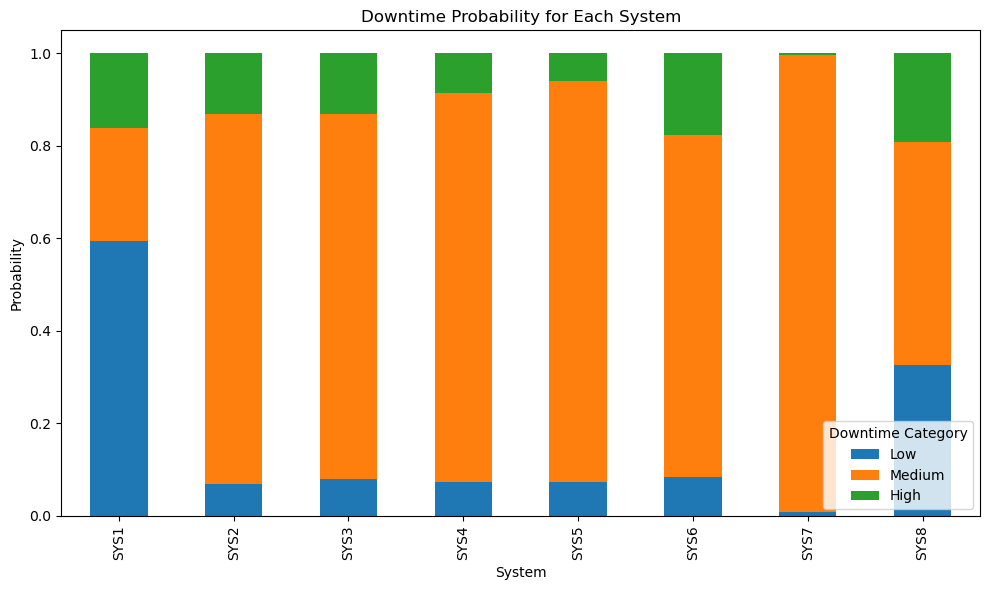

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a list to store the results
results = []

# Iterate through each system and calculate the probability of downtime
for system in systems:
    query_result = inference.query(
        variables=['Downtime_Category'],
        evidence={
            
            
            'System NM_x': system
        }
    )
    
    # Store the probabilities for each downtime category (low, medium, high)
    probs = query_result.values
    results.append({
        'System': system,
        'Low': probs[0],
        'Medium': probs[1],
        'High': probs[2]
    })

# Convert the results into a DataFrame
df_results = pd.DataFrame(results)

# Plot the probabilities for each system
df_results.set_index('System').plot(kind='bar', stacked=True, figsize=(10, 6))

# chart
plt.title('Downtime Probability for Each System')
plt.ylabel('Probability')
plt.xlabel('System')
plt.legend(title='Downtime Category')
plt.tight_layout()
plt.savefig('system.png')
plt.show()


In [27]:
# # Check the unique possession work type names
# possessions = bayes_df['Possession Work Type DS'].unique()

# # Iterate through each possession work type and calculate the probability of downtime
# for possession in possessions:
#     # Query the Bayesian network for each possession type with the given evidence
#     query_result = inference.query(
#         variables=['Downtime_Category','System NM_x'],
#         evidence={
#             'Possession Work Type DS': possession, 
#             'Planned?': 'Planned' 
#         }
#     )
    
#     # Print the result for the specific possession type
#     print(f"Possession Work Type: {possession}")
#     print(query_result)


In [28]:
# Store unique values of systems
systems = bayes_df['System NM_x'].unique()

# Store unique activity categories
activity_categories = bayes_df['Activity_Category'].unique()

for system in systems:
    for activity in activity_categories:
        # Query the Bayesian network for each system and activity category
        query_result = inference.query(
            variables=['Downtime_Category'],  # Query only for Downtime_Category
            evidence={
                'System NM_x': system,
                'Activity_Category': activity
            }
        )

        # Print the results for each system and activity category
        print(f"System: {system}, Activity Category: {activity}")
        print(query_result)


System: SYS1, Activity Category: Maintenance Practices
+---------------------------+--------------------------+
| Downtime_Category         |   phi(Downtime_Category) |
+===========================+==========================+
| Downtime_Category(High)   |                   0.5946 |
+---------------------------+--------------------------+
| Downtime_Category(Low)    |                   0.2432 |
+---------------------------+--------------------------+
| Downtime_Category(Medium) |                   0.1622 |
+---------------------------+--------------------------+
System: SYS1, Activity Category: Human Factors
+---------------------------+--------------------------+
| Downtime_Category         |   phi(Downtime_Category) |
+===========================+==========================+
| Downtime_Category(High)   |                   0.5946 |
+---------------------------+--------------------------+
| Downtime_Category(Low)    |                   0.2432 |
+---------------------------+--------------

In [29]:
# Store unique activity categories
activity_categories = bayes_df['Activity_Category'].unique()

for activity in activity_categories:
    # Query the Bayesian network for each activity category
    query_result = inference.query(
        variables=['Downtime_Category'],  # Query only for Downtime_Category
        evidence={
            'Activity_Category': activity
        }
    )

    # Print the results for each activity category
    print(f"Activity Category: {activity}")
    print(query_result)


Activity Category: Maintenance Practices
+---------------------------+--------------------------+
| Downtime_Category         |   phi(Downtime_Category) |
+===========================+==========================+
| Downtime_Category(High)   |                   0.1218 |
+---------------------------+--------------------------+
| Downtime_Category(Low)    |                   0.7623 |
+---------------------------+--------------------------+
| Downtime_Category(Medium) |                   0.1159 |
+---------------------------+--------------------------+
Activity Category: Human Factors
+---------------------------+--------------------------+
| Downtime_Category         |   phi(Downtime_Category) |
+===========================+==========================+
| Downtime_Category(High)   |                   0.2271 |
+---------------------------+--------------------------+
| Downtime_Category(Low)    |                   0.6159 |
+---------------------------+--------------------------+
| Downtime_Cat

In [30]:
# %% capture cap

# # Store unique values of systems
# corridors = bayes_df['Corridor NM_x'].unique()

# # Store unique activity categories
# activity_categories = bayes_df['Activity_Category'].unique()

# for corridor in corridors:
#     for activity in activity_categories:
#         # Query the Bayesian network for each system and activity category
#         query_result = inference.query(
#             variables=['Downtime_Category'],  # Query only for Downtime_Category
#             evidence={
#                 'Corridor NM_x': corridor,
#                 'Activity_Category': activity
#             }
#         )

#         # Print the results for each system and activity category
#         print(f"Corridor: {corridor}, Activity Category: {activity}")
#         print(query_result)
        
# with open('output.txt', 'w') as file:
#     file.write(cap.stdout)


import sys
from io import StringIO

# Redirect stdout to capture print output
cap = StringIO()
sys.stdout = cap

# Store unique values of systems and activity categories
corridors = bayes_df['Corridor NM_x'].unique()
activity_categories = bayes_df['Activity_Category'].unique()

for corridor in corridors:
    for activity in activity_categories:
        # Query the Bayesian network for each system and activity category
        query_result = inference.query(
            variables=['Downtime_Category'],  # Query only for Downtime_Category
            evidence={
                'Corridor NM_x': corridor,
                'Activity_Category': activity
            }
        )

        # Print the results for each system and activity category
        print(f"Corridor: {corridor}, Activity Category: {activity}")
        print(query_result)

# Reset stdout to original state
sys.stdout = sys.__stdout__

# Write captured output to file
with open('output.txt', 'w') as file:
    file.write(cap.getvalue())


/opt/conda/lib/python3.11/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:489: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi.values.sum()


Note: you may need to restart the kernel to use updated packages.
Best fitting distribution: {'expon': {'loc': 0.0, 'scale': 4722.797345584482}}


In [31]:
# %%capture cap

# # Sample code to generate output
# sample_list = ['Hello', 'Saturn!', 'This', 'is', 'an', 'example.']

# for item in sample_list:
#     print(item)
# # Save the captured output to a text file
# with open('output.txt', 'w') as file:
#     file.write(cap.stdout)

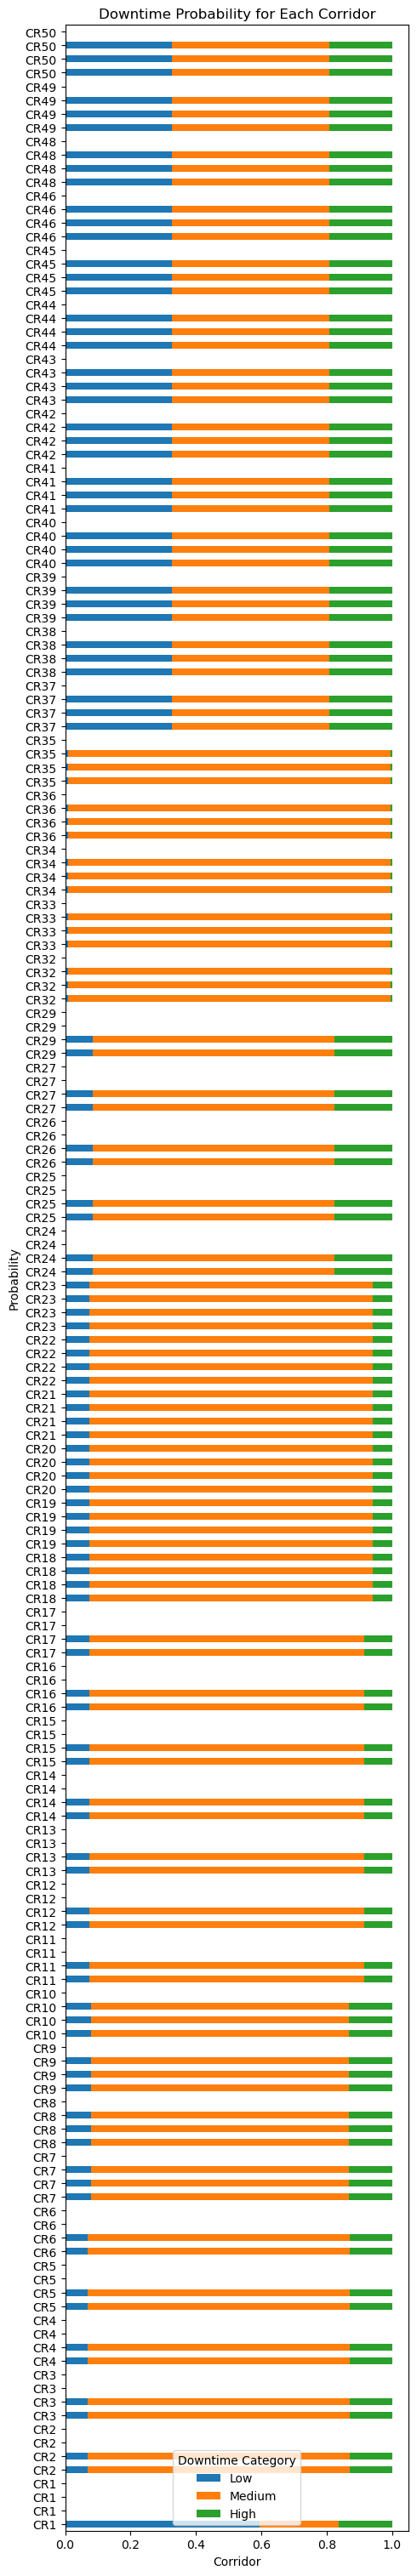

In [32]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Initialize a list to store the results
# results = []
# corridors = bayes_df['Corridor NM_x'].unique()

# # Store unique activity categories
# activity_categories = bayes_df['Activity_Category'].unique()

# # Iterate through each corridor and calculate the probability of downtime
# for corridor in corridors:
#     for activity in activity_categories:
#         query_result = inference.query(
#             variables=['Downtime_Category'],
#             evidence={
#                 'Activity_Category': activity,
#                 'Corridor NM_x': corridor
#             }
#         )

#         # Store the probabilities for each downtime category (low, medium, high)
#         probs = query_result.values
#         results.append({
#             'Corridor': corridor,
#             'Activity_Category': activity,
#             'Low': probs[0],
#             'Medium': probs[1],
#             'High': probs[2]
#         })

# # Convert the results into a DataFrame
# df_results = pd.DataFrame(results)

# # Plot the probabilities for each corridor
# df_results.set_index('Corridor').plot(kind='bar', stacked=True, figsize=(15, 8))

# # Customize the chart
# plt.title('Downtime Probability for Each Corridor')
# plt.ylabel('Probability')
# plt.xlabel('Corridor')
# plt.legend(title='Downtime Category')
# plt.tight_layout()
# plt.xticks(ticks=corridor[::5], rotation=90)
# plt.gca().tick_params(axis='x', which='major', pad=10)
# # Save the chart
# plt.savefig('corridor.png')
# plt.show()


import pandas as pd
import matplotlib.pyplot as plt

# Initialize a list to store the results
results = []
corridors = bayes_df['Corridor NM_x'].unique()

# Store unique activity categories
activity_categories = bayes_df['Activity_Category'].unique()

# Iterate through each corridor and calculate the probability of downtime
for corridor in corridors:
    for activity in activity_categories:
        query_result = inference.query(
            variables=['Downtime_Category'],
            evidence={
                'Activity_Category': activity,
                'Corridor NM_x': corridor
            }
        )

        # Store the probabilities for each downtime category (low, medium, high)
        probs = query_result.values
        results.append({
            'Corridor': corridor,
            'Activity_Category': activity,
            'Low': probs[0],
            'Medium': probs[1],
            'High': probs[2]
        })

# Convert the results into a DataFrame
df_results = pd.DataFrame(results)

# # Plot the probabilities for each corridor
# df_results.set_index('Corridor').plot(kind='bar', stacked=True, figsize=(20, 10))  # Increased figure size for clarity

df_results.set_index('Corridor').plot(kind='barh', stacked=True, figsize=(5, 30))  # Swap to horizontal bars
plt.tight_layout()

# Customize the chart
plt.title('Downtime Probability for Each Corridor')
plt.ylabel('Probability')
plt.xlabel('Corridor')
plt.legend(title='Downtime Category')



# Save the chart
plt.savefig('corridor2.png')
plt.show()



In [33]:
# # Check the unique possession work type names
# possessions = bayes_df['Possession Work Type DS'].unique()
# high_downtime_results=[]


# # Iterate through each possession work type and system, then calculate the probability of downtime
# for possession in possessions:
   
#         # Query the Bayesian network for each possession type and system
#         query_result = inference.query(
#             variables=['Downtime_Category'],
#             evidence={
#                 'Possession Work Type DS': possession, 
#                 'Planned?': 'Planned',
#                 'System NM_x': system
#             }
#         )



#             # Store the probabilities for each downtime category (Low, Medium, High)
#         probs = query_result.values
#         # Append only if the high downtime category has a significant probability
#         if probs[2] > 0.7:  # Adjust the threshold as necessary
#             high_downtime_results.append({
#                 'Possession Work Type': possession,
#                 'System': system,
#                 'Low': probs[0],
#                 'Medium': probs[1],
#                 'High': probs[2]
#             })

# # Convert the results into a DataFrame for easy analysis
# df_high_downtime = pd.DataFrame(high_downtime_results)

# # Display the filtered results
# print(df_high_downtime)

#         # # Print the result for the specific possession type and system
#         # print(f"Possession Work Type: {possession}")
#         # print(query_result)


In [34]:
# # Initialize an empty list to store results
# high_downtime_results = []

# # Get unique possession work types
# possessions = bayes_df['Possession Work Type DS'].unique()

# # Get unique systems
# systems = bayes_df['System NM_x'].unique()

# # Iterate through each possession work type and system to calculate the probability of downtime
# for possession in possessions:
#    # Query the Bayesian network for each possession type and system
#         query_result = inference.query(
#             variables=['Downtime_Category'],
#             evidence={
#                 'Possession Work Type DS': possession, 
#                 'Planned?': 'Planned',
                
#             }
#         )
#         #         # # Print the result for the specific possession type and system
#         print(f"Possession Work Type: {possession}")
#         print(query_result)
        
       


In [35]:
# import networkx as nx
# import matplotlib.pyplot as plt

# # Get an example model
# from pgmpy.utils import get_example_model
# model=bn_model

# # Plot the model
# nx.draw(model)
# plt.draw()

In [36]:
pip install fitter


2024-09-17 07:52:09.043 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.0)
2024-09-17 07:52:09.057 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.0)
2024-09-17 07:52:09.081 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.0)
2024-09-17 07:52:09.097 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=0.0)
2024-09-17 07:52:09.136 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=0.0)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,2.292832e-09,12824.986496,12836.146875,inf,0.517099,0.000000e+00
beta,5.173693e-09,18271.215050,18293.535808,inf,0.207546,1.718583e-74
gamma,2.275634e-08,3282.501981,3299.242549,inf,0.682390,0.000000e+00
norm,2.380642e-08,10105.753764,10116.914143,inf,0.444482,0.000000e+00
lognorm,2.696878e-08,3622.025811,3638.766380,inf,0.531683,0.000000e+00


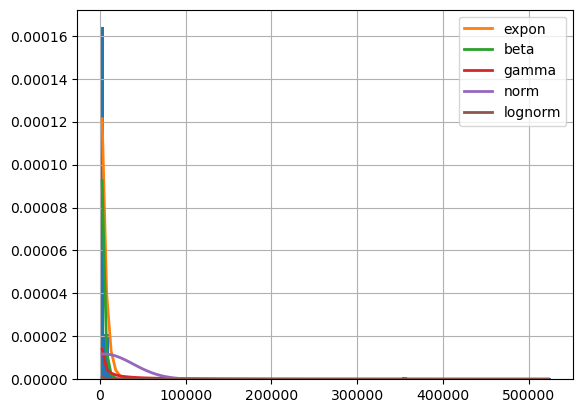

In [39]:
from fitter import Fitter
downtime_data=bayes_df['Downtime']
# Fit common  distributions
f = Fitter(downtime_data, distributions=['norm', 'lognorm', 'expon', 'gamma', 'beta'])

f.fit()

#the best fitting distribution
best_distribution = f.get_best()
print("Best fitting distribution:", best_distribution)

f.summary()


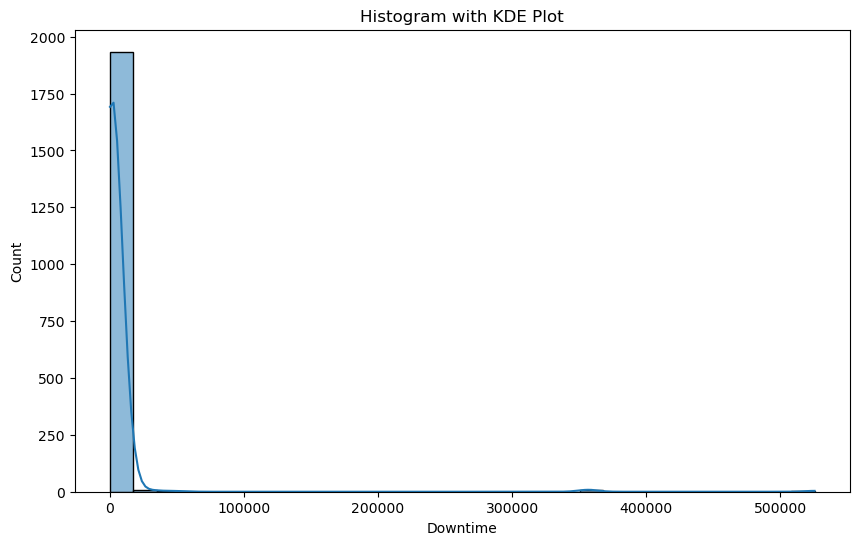

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(downtime_data, bins=30, kde=True)
plt.title('Histogram with KDE Plot')
plt.show()


# test ebirdepy pack

In [ ]:
import birdepy as bd

def custom_b_rate(z, p): return p[0] * z
def custom_d_rate(z, p): return p[1] * z**2




obs_times = [t for t in range(25)]
pop_sizes = bd.simulate.discrete([5, 0.5], model='custom', z0=10, times=obs_times,
                                 b_rate=custom_b_rate, d_rate=custom_d_rate, seed=2021)

import matplotlib.pyplot as plt

plt.step(obs_times, pop_sizes, 'r', where='post', color='tab:purple')
plt.ylabel('Z(t)')
plt.xlabel('t')
plt.show()



# pop_sizes2 = bd.simulate.continuous([5, 0.5], model='custom', z0=10, times=obs_times,
#                                  b_rate=custom_b_rate, d_rate=custom_d_rate, seed=2021,t_max=5)
# plt.step(obs_times, pop_sizes2, 'r', where='post', color='tab:purple')
# plt.ylabel('Z(t)')
# plt.xlabel('t')
# plt.show()


import birdepy as bd
jump_times, pop_sizes = bd.simulate.continuous(1,'Poisson', 0, t_max=5)
print(jump_times)
print(pop_sizes)

plt.step(jump_times,pop_sizes)
plt.ylabel('Z(t)')
plt.xlabel('t')
plt.show()

In [ ]:
! pip install birdepy
import birdepy as bdp
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define Birth, Death, and Horizontal Transition Rates
# Birth and death rates for transitions between levels (vertical transitions)
birth_rate = 1.0  # λ (birth rate, failure rate between levels)
death_rate = 0.5  # μ (death rate, repair rate between levels)

# Horizontal transition rates (within the same level/quasi-state transitions)
horizontal_transition_rate = 0.2  # Example transition rate between quasi states

# Step 2: Define a Custom QBD Process with Quasi States
class QBDProcess:
    def __init__(self, birth_rate, death_rate, horizontal_rate):
        self.birth_rate = birth_rate
        self.death_rate = death_rate
        self.horizontal_rate = horizontal_rate

    def simulate(self, time_span, num_levels=3):
        state = (0, 0)  # Start in level 0, quasi state 0
        states = [state]
        times = [0]

        while times[-1] < time_span:
            current_level, current_quasi = state

            # Determine possible transitions:
            rates = []
            if current_level > 0:
                rates.append(self.death_rate)  # Vertical death (repair)
            rates.append(self.birth_rate)  # Vertical birth (failure)
            rates.append(self.horizontal_rate)  # Horizontal transitions

            # Total rate for exponential distribution
            total_rate = sum(rates)
            waiting_time = np.random.exponential(1 / total_rate)
            times.append(times[-1] + waiting_time)

            # Determine which event happens
            event_probabilities = np.array(rates) / total_rate
            event = np.random.choice(len(rates), p=event_probabilities)

            # Update the state based on the event
            if event == 0 and current_level > 0:  # Vertical death (repair)
                current_level -= 1
            elif event == 1:  # Vertical birth (failure)
                current_level += 1
            elif event == 2:  # Horizontal transition (quasi state change)
                current_quasi = (current_quasi + 1) % num_levels  # Cycle through quasi states

            state = (current_level, current_quasi)
            states.append(state)

        return states, times

# Step 3: Simulate the QBD Process with Quasi States
qbd = QBDProcess(birth_rate, death_rate, horizontal_transition_rate)
time_span = 100  # Simulate for 100 units of time
states, times = qbd.simulate(time_span)

# Step 4: Plot the Results
levels = [state[0] for state in states]
plt.figure(figsize=(10, 6))
plt.step(times, levels, where='post')
plt.xlabel("Time")
plt.ylabel("Level (State)")
plt.title("QBD Process with Quasi States")
plt.grid(True)
plt.show()


In [ ]:
# !pip install pymatrix
# import pymatrix as pm

# # Define the transition matrices for the QBD process
# # Transition rates between levels and phases
# B = [[-2, 1], [1, -2]]  # Block for death (repair)
# A = [[1, 0], [0, 1]]    # Block for birth (failure)

# # Define the QBD model
# qbd_model = pm.QBD(A, B)

# # Solve for steady-state probabilities
# steady_state_probs = qbd_model.steady_state()

# print("Steady-state probabilities:", steady_state_probs)
